In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/home/dsc/Documents/Week_10/kaggke_car_insurance/carInsurance_train.csv')

In [4]:
df.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0


In [5]:
df_numeric = df.select_dtypes('number')
df_numeric.head()

,Id,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
0,1,32,0,1218,1,0,28,2,-1,0,0
1,2,32,0,1156,1,0,26,5,-1,0,0
2,3,29,0,637,1,0,3,1,119,1,1
3,4,25,0,373,1,0,11,2,-1,0,1
4,5,30,0,2694,0,0,3,1,-1,0,0


In [6]:
df_numeric.describe()

,Id,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,2000.500000,41.214750,0.014500,1532.937250,0.49275,0.133000,15.721250,2.607250,48.706500,0.717500,0.401000
std,1154.844867,11.550194,0.119555,3511.452489,0.50001,0.339617,8.425307,3.064204,106.685385,2.078647,0.490162
min,1.000000,18.000000,0.000000,-3058.000000,0.00000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,1000.750000,32.000000,0.000000,111.000000,0.00000,0.000000,8.000000,1.000000,-1.000000,0.000000,0.000000
50%,2000.500000,39.000000,0.000000,551.500000,0.00000,0.000000,16.000000,2.000000,-1.000000,0.000000,0.000000
75%,3000.250000,49.000000,0.000000,1619.000000,1.00000,0.000000,22.000000,3.000000,-1.000000,0.000000,1.000000
max,4000.000000,95.000000,1.000000,98417.000000,1.00000,1.000000,31.000000,43.000000,854.000000,58.000000,1.000000


In [7]:
df_numeric = df_numeric.fillna(df_numeric.median())
df_numeric.describe()

,Id,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,2000.500000,41.214750,0.014500,1532.937250,0.49275,0.133000,15.721250,2.607250,48.706500,0.717500,0.401000
std,1154.844867,11.550194,0.119555,3511.452489,0.50001,0.339617,8.425307,3.064204,106.685385,2.078647,0.490162
min,1.000000,18.000000,0.000000,-3058.000000,0.00000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,1000.750000,32.000000,0.000000,111.000000,0.00000,0.000000,8.000000,1.000000,-1.000000,0.000000,0.000000
50%,2000.500000,39.000000,0.000000,551.500000,0.00000,0.000000,16.000000,2.000000,-1.000000,0.000000,0.000000
75%,3000.250000,49.000000,0.000000,1619.000000,1.00000,0.000000,22.000000,3.000000,-1.000000,0.000000,1.000000
max,4000.000000,95.000000,1.000000,98417.000000,1.00000,1.000000,31.000000,43.000000,854.000000,58.000000,1.000000


In [8]:
X = df_numeric.drop('CarInsurance',axis=1)

In [9]:
X.head()

,Id,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts
0,1,32,0,1218,1,0,28,2,-1,0
1,2,32,0,1156,1,0,26,5,-1,0
2,3,29,0,637,1,0,3,1,119,1
3,4,25,0,373,1,0,11,2,-1,0
4,5,30,0,2694,0,0,3,1,-1,0


In [10]:
df_numeric.shape, X.shape

((4000, 11), (4000, 10))

In [11]:
y = df_numeric['CarInsurance']

In [12]:
y.shape

(4000,)

In [21]:
#Solo las columnas no numéricas

df_non_numeric = df.select_dtypes(exclude='number')
df_non_numeric.head()

,Job,Marital,Education,Communication,LastContactMonth,Outcome,CallStart,CallEnd
0,management,single,tertiary,telephone,jan,NaN,13:45:20,13:46:30
1,blue-collar,married,primary,NaN,may,NaN,14:49:03,14:52:08
2,management,single,tertiary,cellular,jun,failure,16:30:24,16:36:04
3,student,single,primary,cellular,may,NaN,12:06:43,12:20:22
4,management,married,tertiary,cellular,jun,NaN,14:35:44,14:38:56


In [24]:
df_non_numeric.columns

Index(['Job', 'Marital', 'Education', 'Communication', 'LastContactMonth',
       'Outcome', 'CallStart', 'CallEnd'],
      dtype='object')

In [23]:
df_non_numeric['Job'].value_counts()

management       893
blue-collar      759
technician       660
admin.           459
services         330
retired          249
self-employed    140
student          131
unemployed       130
entrepreneur     121
housemaid        109
Name: Job, dtype: int64

In [28]:
df_non_numeric['Job'].value_counts().sum()

3981

In [25]:
df_non_numeric['Marital'].value_counts()

married     2304
single      1213
divorced     483
Name: Marital, dtype: int64

In [29]:
df_non_numeric['Marital'].value_counts().sum()

4000

In [26]:
df_non_numeric['Education'].value_counts()

secondary    1988
tertiary     1282
primary       561
Name: Education, dtype: int64

In [30]:
df_non_numeric['Education'].value_counts().sum()

3831

In [27]:
df_non_numeric['Communication'].value_counts()

cellular     2831
telephone     267
Name: Communication, dtype: int64

In [31]:
df_non_numeric['Communication'].value_counts().sum()

3098

In [32]:
df_non_numeric['LastContactMonth'].value_counts()

may    1049
jul     573
aug     536
jun     454
nov     347
apr     306
feb     262
jan     134
oct     118
sep     101
mar      79
dec      41
Name: LastContactMonth, dtype: int64

In [33]:
df_non_numeric['LastContactMonth'].value_counts().sum()

4000

In [34]:
df_non_numeric['Outcome'].value_counts()

failure    437
success    326
other      195
Name: Outcome, dtype: int64

In [35]:
df_non_numeric['Outcome'].value_counts().sum()

958

In [37]:
df_non_numeric['CallStart'].value_counts().sum()

4000

In [38]:
df_non_numeric['CallEnd'].value_counts().sum()

4000

In [51]:
df_non_num_sub = df_non_numeric.drop(['Communication','Outcome','CallStart','CallEnd'],axis=1)

In [52]:
df_non_num_sub.head()

,Job,Marital,Education,LastContactMonth
0,management,single,tertiary,jan
1,blue-collar,married,primary,may
2,management,single,tertiary,jun
3,student,single,primary,may
4,management,married,tertiary,jun


In [56]:
df_total = pd.concat([df_numeric, df_non_num_sub], axis=1)
df_total.head()

,Id,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance,Job,Marital,Education,LastContactMonth
0,1,32,0,1218,1,0,28,2,-1,0,0,management,single,tertiary,jan
1,2,32,0,1156,1,0,26,5,-1,0,0,blue-collar,married,primary,may
2,3,29,0,637,1,0,3,1,119,1,1,management,single,tertiary,jun
3,4,25,0,373,1,0,11,2,-1,0,1,student,single,primary,may
4,5,30,0,2694,0,0,3,1,-1,0,0,management,married,tertiary,jun


In [58]:
df_total.shape

(4000, 15)

In [61]:
#Eliminar NaN

df_total.dropna(inplace=True)

In [62]:
df_total.shape

(3820, 15)

In [70]:
#One Hot Encoding

#Ojo, esto está mal, se ha hecho el OneHotEncoder de todo el DataFrame lo que está mal. 
#Hay que volvrr 

from numpy import asarray
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)
df_total_onehot = encoder.fit_transform(df_total)
print(df_total_onehot)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [13]:
import seaborn as sns

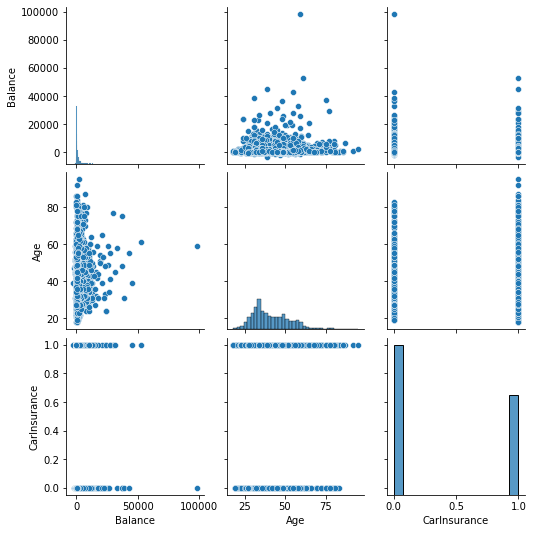

In [16]:
sns.pairplot(df_numeric[['Balance','Age','CarInsurance']])

In [18]:
#Logistic regression
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X,y)

/home/dsc/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf,X,y,scoring="f1")

/home/dsc/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/dsc/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

array([0.36016949, 0.36888889, 0.34782609, 0.37387387, 0.29353234])

In [20]:
cross_val_score(clf,X,y,scoring="f1").mean()

/home/dsc/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/dsc/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

0.34885813591063314

In [41]:
#K-NEIGHBORS

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

clf_gk = GridSearchCV(KNeighborsClassifier(),
                   param_grid={"n_neighbors":np.arange(1,10)},
                   scoring="f1")
clf_gk.fit(X,y)
clf_gk.best_params_

{'n_neighbors': 1}

In [43]:
clf_gk.best_estimator_

KNeighborsClassifier(n_neighbors=1)

In [44]:
cross_val_score(clf_gk,X,y,scoring="f1")

array([0.55004859, 0.39939024, 0.37083994, 0.46933333, 0.18004866])

In [46]:
#DECISION TREES
from sklearn.tree import DecisionTreeClassifier

clf_gd = GridSearchCV(DecisionTreeClassifier(),
                       param_grid={"max_depth":np.arange(2,11),
                                  "min_samples_leaf":np.arange(10,100,15)},
                       scoring="f1")
clf_gd.fit(X,y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'min_samples_leaf': array([10, 25, 40, 55, 70, 85])},
             scoring='f1')

In [47]:
clf_gd.fit(X,y).best_params_

{'max_depth': 10, 'min_samples_leaf': 40}

In [48]:
clf_gd.fit(X,y).best_score_

0.5342106867472165

In [ ]:
clf_gd = GridSearchCV(DecisionTreeClassifier(),
                       param_grid={"max_depth":np.arange(2,11),
                                  "min_samples_leaf":np.arange(10,100,15)},
                       scoring="f1")
clf_gd.fit(X,y)

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=8)



In [66]:
clf_gd.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'min_samples_leaf': array([10, 25, 40, 55, 70, 85])},
             scoring='f1')

In [72]:
clf_gd.cv_results_

{'mean_fit_time': array([0.00336695, 0.00310736, 0.00292845, 0.00290337, 0.00272794,
        0.00270905, 0.00332465, 0.0033031 , 0.00330005, 0.00330472,
        0.00327892, 0.00328708, 0.00389271, 0.00383606, 0.00389924,
        0.00382857, 0.00372715, 0.00369611, 0.00439301, 0.00430145,
        0.00424194, 0.00416722, 0.00406208, 0.00395389, 0.00492058,
        0.00480676, 0.00462737, 0.00444183, 0.00442486, 0.00417042,
        0.0053793 , 0.00514245, 0.00488582, 0.00471802, 0.00452843,
        0.00424452, 0.00634146, 0.00573831, 0.00532379, 0.00499582,
        0.0046627 , 0.00432382, 0.00629802, 0.00580931, 0.00524292,
        0.00496554, 0.00458117, 0.00431247, 0.00650582, 0.00577006,
        0.00526628, 0.00500774, 0.00456915, 0.00431604]),
 'std_fit_time': array([3.93696464e-04, 2.49527359e-04, 1.55438557e-04, 2.54362059e-04,
        5.17445000e-05, 4.59317214e-05, 7.04941450e-05, 3.82170629e-05,
        6.58656256e-05, 4.60902026e-05, 1.63878047e-05, 4.72884485e-05,
        4.109

In [69]:
from sklearn.metrics import f1_score

f1_score(y_test,clf_gd.predict(X_test))

0.5536723163841807